[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/bigdata_analyst_cert_v2/blob/main/part2/ch8/ch8_ex_regression.ipynb)

# Section1

In [96]:
# 1. 문제정의
# 평가: RMSE
# target: price
# 최종파일: result.csv(컬럼 1개 pred)

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("flight_train.csv")
# test = pd.read_csv("flight_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_test.csv")
train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-776,Kolkata,Evening,one,Late_Night,Delhi,Economy,6.58,31,7056
1,Vistara,UK-852,Bangalore,Morning,zero,Morning,Mumbai,Business,1.92,37,20760
2,Indigo,6E-2348,Delhi,Evening,one,Late_Night,Bangalore,Economy,5.58,25,3671
3,Air_India,AI-763,Kolkata,Early_Morning,one,Evening,Chennai,Business,12.00,15,55983
4,Indigo,6E-752,Hyderabad,Early_Morning,one,Evening,Chennai,Economy,9.50,20,5220
...,...,...,...,...,...,...,...,...,...,...,...
10500,Vistara,UK-864,Bangalore,Evening,one,Morning,Chennai,Economy,16.83,11,9241
10501,Vistara,UK-774,Kolkata,Night,zero,Night,Mumbai,Economy,2.92,20,4499
10502,AirAsia,I5-1531,Chennai,Night,one,Afternoon,Delhi,Economy,16.08,27,2477
10503,Vistara,UK-651,Mumbai,Evening,one,Night,Kolkata,Business,28.67,2,79148


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB


In [91]:
train.describe()


,flight,duration,days_left
count,10505.000000,10505.000000,10505.000000
mean,1425.858448,12.225536,26.050547
std,1983.972871,7.182264,13.539947
min,101.000000,0.830000,1.000000
25%,638.000000,6.750000,15.000000
50%,819.000000,11.250000,26.000000
75%,927.000000,16.170000,38.000000
max,9929.000000,40.500000,49.000000


In [89]:
train.describe(include='O')
#unique가 1000개?;;

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
count,10505,10505,10505,10505,10505,10505,10505
unique,6,6,6,3,6,6,2
top,Vistara,Mumbai,Morning,one,Night,Mumbai,Economy
freq,4425,2112,2470,8750,3220,2103,7306


In [7]:
test.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,4502,4502,4502,4502,4502,4502,4502,4502
unique,6,893,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,1949,54,939,1090,3725,1351,903,3095


In [97]:
train['flight'] = train['flight'].str[3:].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  int64  
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 902.9+ KB


In [98]:
test['flight'] = test['flight'].str[3:].astype(int)


In [99]:
y_train = train.pop('price')

In [100]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [23]:
df = pd.concat([train, test])

from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include='object').columns

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])



In [24]:
train = df.iloc[:len(train)]
test = df.iloc[len(train):]

train.shape, test.shape

((10505, 10), (4502, 10))

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['days_left', 'duration', 'flight']          
train[cols] = sc.fit_transform(train[cols])
test[cols] = sc.transform(test[cols])

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, y_train, test_size=0.2, random_state=0)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

rf = RandomForestRegressor(random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, pred)
rmse

3670.8626861545945

In [77]:
import lightgbm
import xgboost

lg = xgboost.XGBRegressor(random_state=0, max_depth=6, n_estimators=200, learning_rate=0.3)
lg.fit(X_train, y_train)
pred = lg.predict(X_val)
rmse = root_mean_squared_error(y_val, pred)
rmse

3814.185546875

In [18]:
pred

array([ 6368.54, 12651.41,  7153.08, ..., 41691.22,  5539.88, 45136.77])

In [28]:
rmse = root_mean_squared_error(y_val, pred)
rmse

3779.140842687931

### 베이스라인

In [14]:
# 1. 문제정의
# 평가: RMSE
# target: price
# 최종파일: result.csv(컬럼 1개 pred)

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("flight_train.csv")
# test = pd.read_csv("flight_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_test.csv")

# 3. 탐색적 데이터 분석(EDA)
print("===== 데이터 크기 =====")
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

print("\n ===== 데이터 정보(자료형) =====")
print(train.info())

print("\n ===== train 결측치 수 =====")
print(train.isnull().sum().sum())

print("\n ===== test 결측치 수 =====")
print(test.isnull().sum().sum())

print("\n ===== 카테고리 비교 =====")
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test= set(test[col])
    same = (set_train == set_test)
    if same:
        print(col, "\t카테고리 동일함")
    else:
        print(col, "\t카테고리 동일하지 않음")

print("\n ===== target 기술 통계 =====")
print(train['price'].describe())

===== 데이터 크기 =====
Train Shape: (10505, 11)
Test Shape: (4502, 10)

 ===== 데이터 정보(자료형) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB
None

 ===== train 결측치 수 =====
0

 ===== test 결측치 수 =====
0

 ===== 카테고리 비교 =====
airline 	카테고리 동일함
flight 	카테고리 동일하지 않음
so

<Axes: >

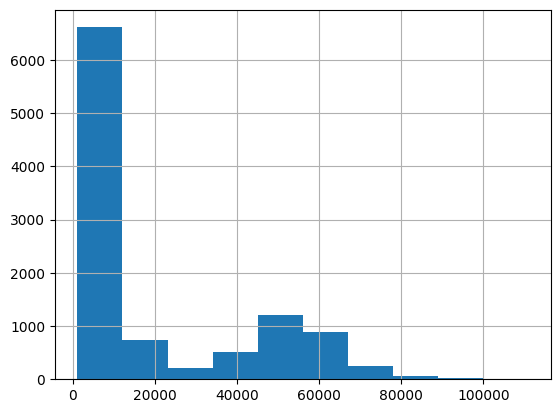

In [15]:
train['price'].hist()

In [16]:
# 4. 데이터 전처리
target = train.pop('price')

# 컬럼 삭제
train = train.drop('flight', axis=1)
test = test.drop('flight', axis=1)

# 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

print("\n ===== 분할된 데이터 크기 =====")
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

# RMSE(Root Mean Squared Error)
from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val, pred)
print('\n rmse:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

# 제출파일 확인
print("\n ===== 제출파일 (샘플 5개) =====")
print(pd.read_csv("result.csv").head())


 ===== 분할된 데이터 크기 =====
(8404, 37) (2101, 37) (8404,) (2101,)

 rmse: 4376.841613585934

 ===== 제출파일 (샘플 5개) =====
       pred
0  57356.34
1   5334.44
2  13244.83
3   5951.10
4   5102.89


### 성능개선

In [17]:
# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("flight_train.csv")
# test = pd.read_csv("flight_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/flight_test.csv")

# 4. 데이터 전처리
target = train.pop('price')

# flight 컬럼 일부 사용
train['f2'] = train['flight'].str.split('-').str[1].astype(int)
test['f2'] = test['flight'].str.split('-').str[1].astype(int)

# 컬럼 삭제
train = train.drop('flight', axis=1)
test = test.drop('flight', axis=1)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['duration', 'days_left']
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

# 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 레이블 인코딩
# from sklearn.preprocessing import LabelEncoder
# cols = train.select_dtypes(include='object').columns
# for col in cols:
#     le = LabelEncoder()
#     train[col] = le.fit_transform(train[col])
#     test[col] = le.transform(test[col])

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

# RMSE(Root Mean Squared Error)
from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val, pred)
print('rmse:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

rmse: 3675.155093297134


# Section2

### 베이스라인

In [18]:
# 1. 문제정의
# 평가: R2
# target: Price
# 최종파일: result.csv(컬럼 1개 pred, 1확률값)

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("laptop_train.csv")
# test = pd.read_csv("laptop_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_test.csv")

# 3. 탐색적 데이터 분석(EDA)
print("===== 데이터 크기 =====")
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

print("===== 데이터 정보(자료형) =====")
print(train.info())

print("\n ===== train 결측치 수 =====")
print(train.isnull().sum())

print("\n ===== test 결측치 수 =====")
print(test.isnull().sum())

print("\n ===== 카테고리 비교 =====")
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test= set(test[col])
    same = (set_train == set_test)
    if same:
        print(col, "\t카테고리 동일함")
    else:
        print(col, "\t카테고리 동일하지 않음")

print("\n ===== target 기술 통계 =====")
print(train['Price'].describe())

===== 데이터 크기 =====
Train Shape: (91, 10)
Test Shape: (39, 9)
===== 데이터 정보(자료형) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               91 non-null     object 
 1   Model               82 non-null     object 
 2   Series              55 non-null     object 
 3   Processor           86 non-null     object 
 4   Processor_Gen       86 non-null     object 
 5   RAM                 85 non-null     float64
 6   Hard_Disk_Capacity  85 non-null     object 
 7   OS                  85 non-null     object 
 8   Rating              91 non-null     float64
 9   Price               91 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.2+ KB
None

 ===== train 결측치 수 =====
Brand                  0
Model                  9
Series                36
Processor              5
Processor_Gen          5
RAM   

In [19]:
# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("laptop_train.csv")
# test = pd.read_csv("laptop_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_test.csv")

# 4. 데이터 전처리
target = train.pop('Price')

# 결측치 처리(범주형)
c_cols = ['Model', 'Series', 'Processor', 'Processor_Gen', 'Hard_Disk_Capacity', 'OS']
train[c_cols] = train[c_cols].fillna("X")
test[c_cols] = test[c_cols].fillna("X")

# 결측치 처리(수치형)
n_cols = ['RAM']
train[n_cols] = train[n_cols].fillna(-1)
test[n_cols] = test[n_cols].fillna(-1)

# 원핫인코딩
combined = pd.concat([train, test])
combined_dummies = pd.get_dummies(combined)
n_train = len(train)
train = combined_dummies[:n_train]
test = combined_dummies[n_train:]

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

print("\n ===== 분할된 데이터 크기 =====")
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

from sklearn.metrics import r2_score
result = r2_score(y_val, pred)
print('\n r2:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

# 제출파일 확인
print("\n ===== 제출파일 (샘플 5개) =====")
print(pd.read_csv("result.csv").head())


 ===== 분할된 데이터 크기 =====
(72, 119) (19, 119) (72,) (19,)

 r2: 0.7496764602229047

 ===== 제출파일 (샘플 5개) =====
       pred
0  40979.15
1  39366.98
2  60343.56
3  39960.00
4  44331.60


### 성능개선

In [20]:
# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("laptop_train.csv")
# test = pd.read_csv("laptop_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/laptop_test.csv")

# 4. 데이터 전처리
target = train.pop('Price')

# 결측치 삭제
train = train.drop('Series', axis=1)
test = test.drop('Series', axis=1)

# 결측치 삭제
train = train.drop('Model', axis=1)
test = test.drop('Model', axis=1)

# 결측치 처리(범주형)
c_cols = ['Processor', 'Processor_Gen', 'Hard_Disk_Capacity', 'OS']
train[c_cols] = train[c_cols].fillna("X")
test[c_cols] = test[c_cols].fillna("X")

# 결칙치 처리(수치형)
n_cols = ['RAM']
train[n_cols] = train[n_cols].fillna(-1)
test[n_cols] = test[n_cols].fillna(-1)

# 원핫인코딩
combined = pd.concat([train, test])
combined_dummies = pd.get_dummies(combined)
n_train = len(train)
train = combined_dummies[:n_train]
test = combined_dummies[n_train:]

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

from sklearn.metrics import r2_score
result = r2_score(y_val, pred)
print('r2:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

r2: 0.8042392429064131


# Section3

### 베이스라인

In [21]:
# 1. 문제정의
# 평가: RMSLE
# target: Price
# 최종파일: result.csv(컬럼 1개 pred)

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("car_train.csv")
# test = pd.read_csv("car_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_test.csv")

# 3. 탐색적 데이터 분석(EDA)
print("===== 데이터 크기 =====")
print(train.shape, test.shape)

print("\n ===== train 데이터 샘플 =====")
print(train.head(1))

print("\n ===== test 데이터 샘플 =====")
print(test.head(1))

print("\n ===== 데이터 정보(자료형) =====")
print(train.info())

print("\n ===== train 결측치 수 =====")
print(train.isnull().sum().sum())

print("\n ===== test 결측치 수 =====")
print(test.isnull().sum().sum())

print("\n ===== 카테고리 비교 =====")
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test= set(test[col])
    same = (set_train == set_test)
    if same:
        print(col, "\t카테고리 동일함")
    else:
        print(col, "\t카테고리 동일하지 않음")

print("\n ===== target 기술 통계 =====")
print(train['Price'].describe())

===== 데이터 크기 =====
(6732, 17) (5772, 16)

 ===== train 데이터 샘플 =====
   Price Levy Manufacturer   Model  Prod. year Category Leather interior  \
0  13956  603        LEXUS  RX 450        2015     Jeep              Yes   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid           3.5  143619 km        6.0     Automatic          4x4   

    Doors       Wheel  Color  Airbags  
0  04-May  Left wheel  Black       12  

 ===== test 데이터 샘플 =====
  Levy Manufacturer   Model  Prod. year Category Leather interior Fuel type  \
0  730    SSANGYONG  Actyon        2016     Jeep              Yes    Petrol   

  Engine volume   Mileage  Cylinders Gear box type Drive wheels   Doors  \
0           1.6  70940 km        4.0     Automatic        Front  04-May   

        Wheel  Color  Airbags  
0  Left wheel  Black        4  

 ===== 데이터 정보(자료형) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 17 columns):
 #   Colu

In [22]:
# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("car_train.csv")
# test = pd.read_csv("car_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_test.csv")

# 4. 데이터 전처리
target = train.pop('Price')

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
combined = pd.concat([train, test])
cols = train.select_dtypes(include='object').columns

for col in cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])

n_train = len(train)
train = combined[:n_train]
test = combined[n_train:]

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

# RMSLE
from sklearn.metrics import root_mean_squared_log_error
result = root_mean_squared_log_error(y_val, pred)
print('rmsle:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

rmsle: 1.1008952910276844


### 성능개선

In [23]:
# train = pd.read_csv("car_train.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_train.csv")
train['Engine volume'].value_counts()

,count
Engine volume,
2,1342
2.5,823
1.8,623
1.6,533
1.5,453
3.5,420
2.4,344
3,285
1.3,177


In [24]:
# 행(row) 100개 출력으로 설정 변경
pd.options.display.max_rows = 100

In [25]:
train['Mileage'].str.split().str[1].value_counts()

,count
Mileage,
km,6732


In [26]:
# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("car_train.csv")
# test = pd.read_csv("car_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch8/car_test.csv")

# 4. 데이터 전처리
target = train.pop('Price')

# Engine volume 자료형 변경 및 Turbo 컬럼 생성
train['Turbo'] = train['Engine volume'].str.contains('Turbo').astype(int)
train['Engine volume'] = train['Engine volume'].str.replace('Turbo', '').astype(float)

test['Turbo'] = test['Engine volume'].str.contains('Turbo').astype(int)
test['Engine volume'] = test['Engine volume'].str.replace('Turbo', '').astype(float)

# Mileage 자료형 변경(km 제거)
train['Mileage'] = train['Mileage'].str.split().str[0].astype(int)
test['Mileage'] = test['Mileage'].str.split().str[0].astype(int)

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
combined = pd.concat([train, test])
cols = train.select_dtypes(include='object').columns

for col in cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])

n_train = len(train)
train = combined[:n_train]
test = combined[n_train:]

# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)

# 6. 머신러닝 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

# RMSLE
from sklearn.metrics import root_mean_squared_log_error
result = root_mean_squared_log_error(y_val, pred)
print('rmsle:', result)

# 7. 예측 및 결과 파일 생성
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

rmsle: 1.082016203127291
